In [20]:
!pip install pyplr
!pip install neurokit2
!pip install fastnumbers
!pip install datamatrix

import sys
sys.path.append("../Pupillengröße/Skripte/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
from preprocessfunction2 import PLR2d
from preprocessfunction3 import PLR3d
import checkdataPLR
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


You should consider upgrading via the '/Users/Katharina/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.


In [34]:
# reload checkdata
importlib.reload(checkdataPLR)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
subject_id="PJ04_1_PLR1"
#data_dir="../data/groesse/3.4Stimulation/"
data_dir="/Users/Katharina/Desktop/Beispieldaten"
rec_dir="/Users/Katharina/Desktop/Beispieldaten"
config=checkdataPLR.DataConfig(window_duration=80) #7200
eye0=checkdataPLR.prepare(data_dir,subject_id,0,config)
eye1=checkdataPLR.prepare(data_dir,subject_id,1,config)
# checkdata.plot(eye0[0],"auge 0 (0)")
# display(eye0[0])


### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

pandas.core.series.Series

pandas.core.series.Series

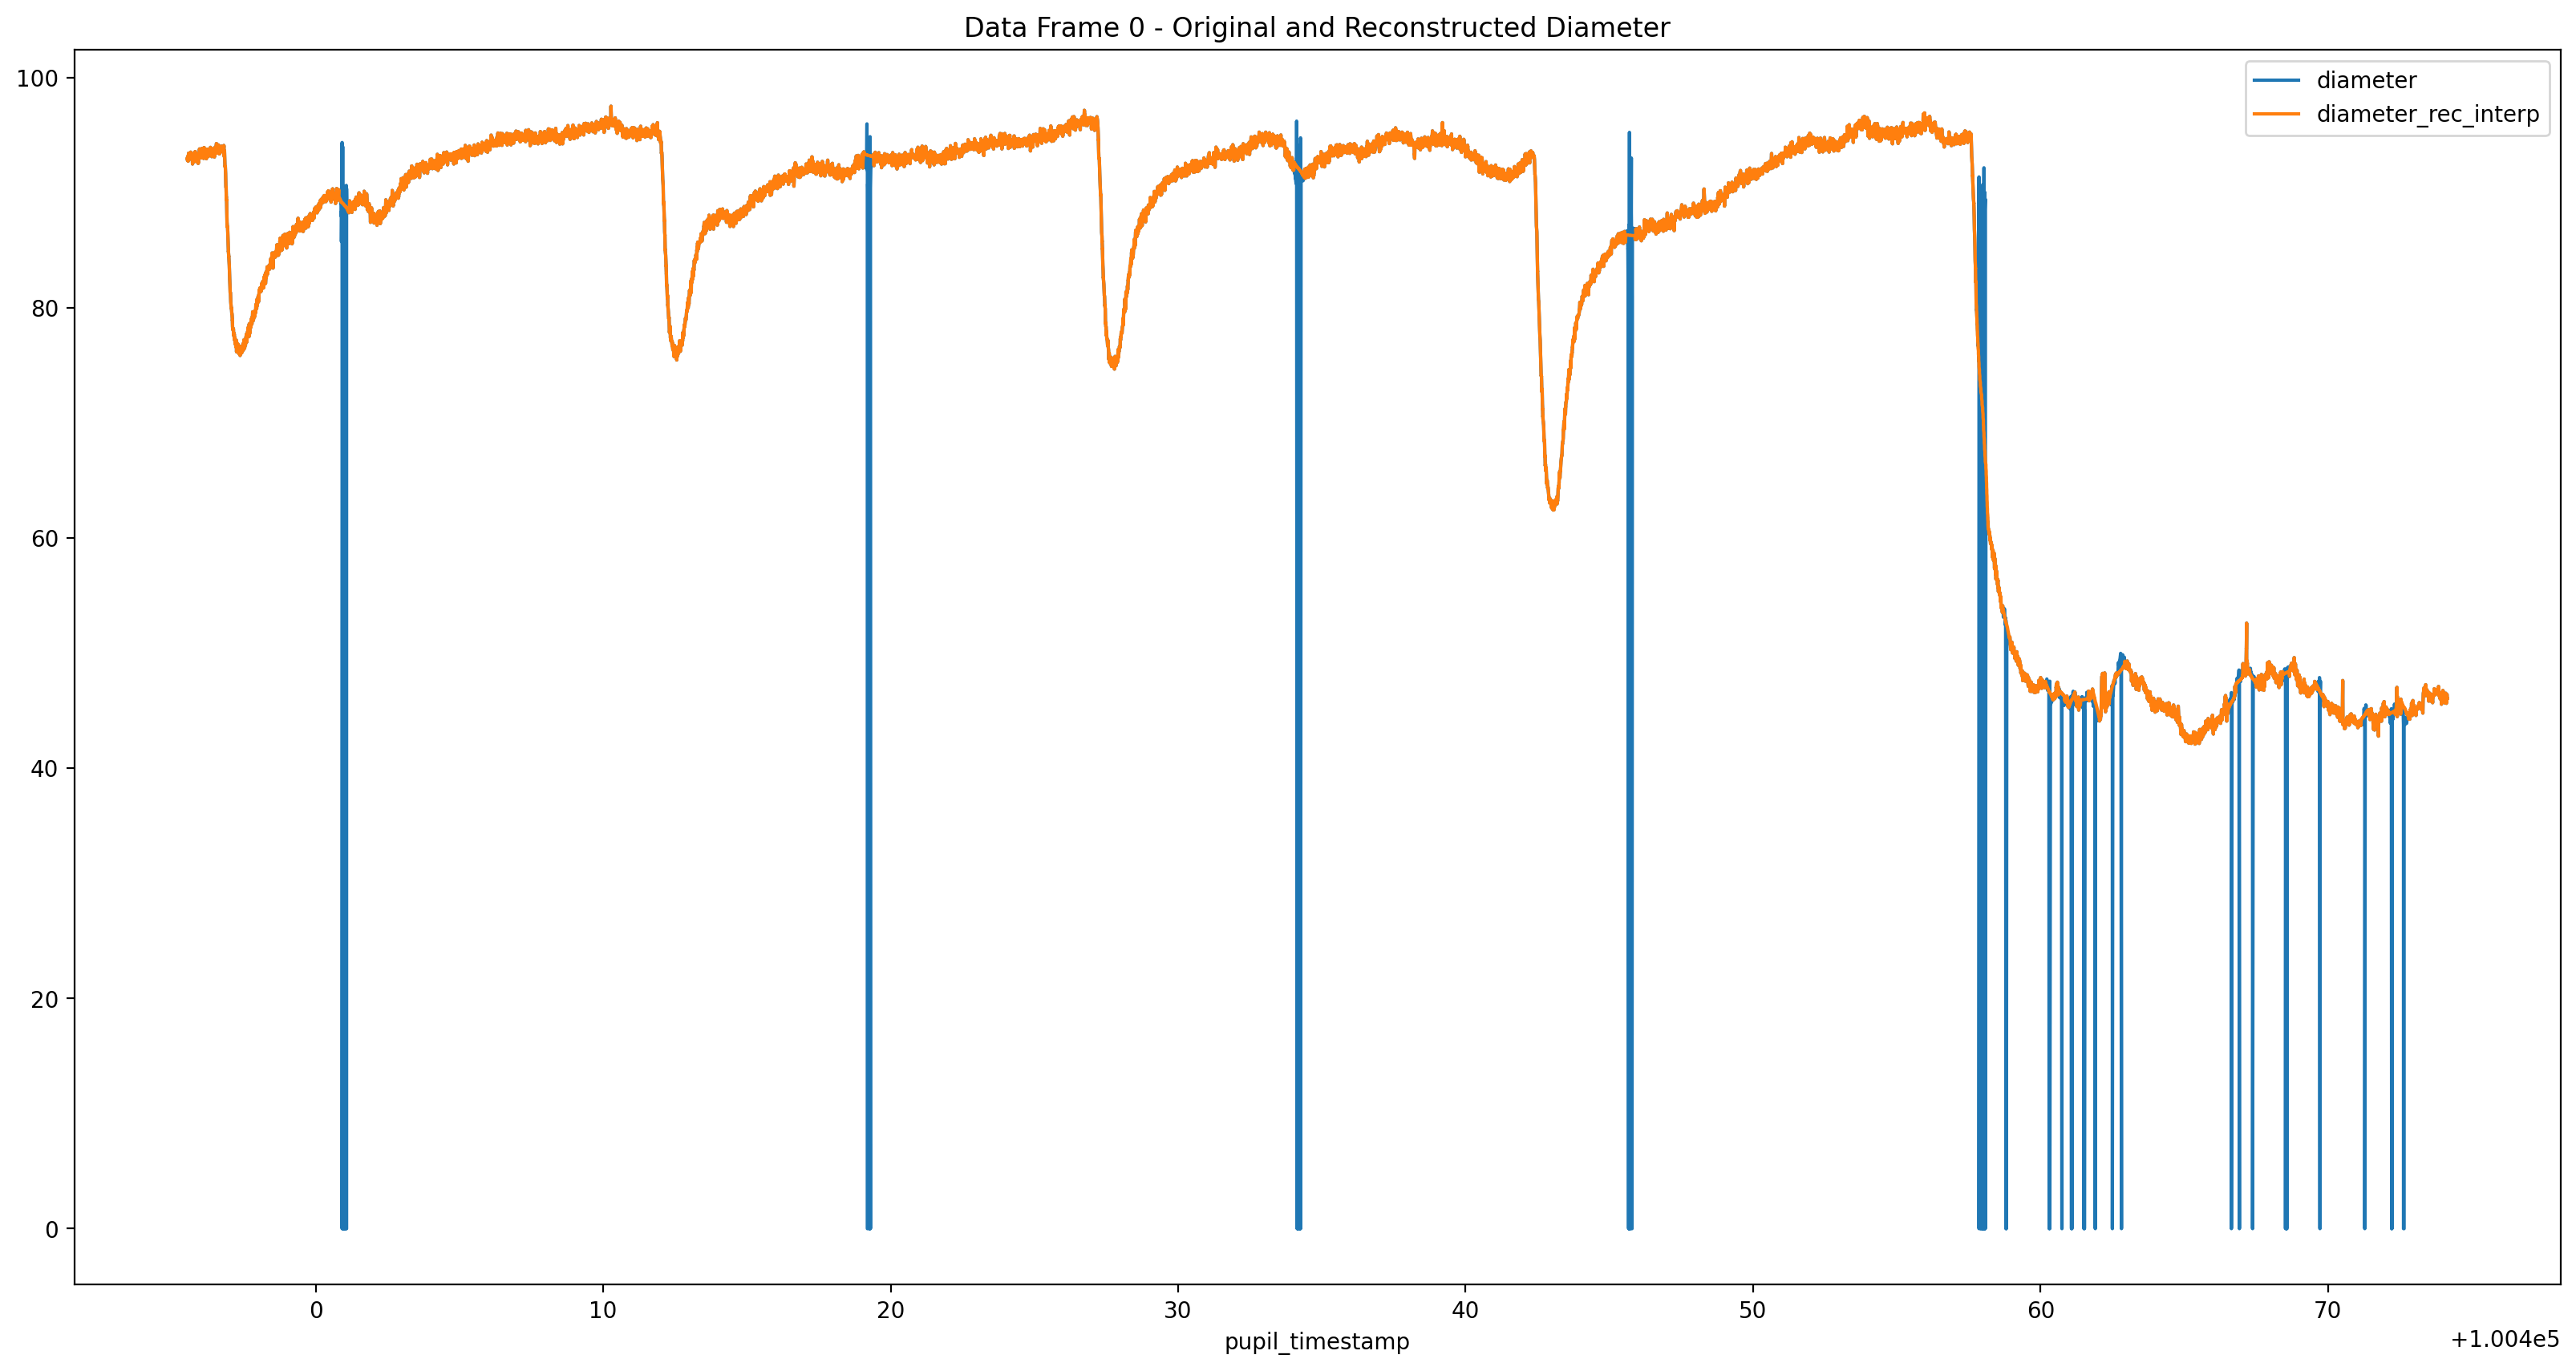

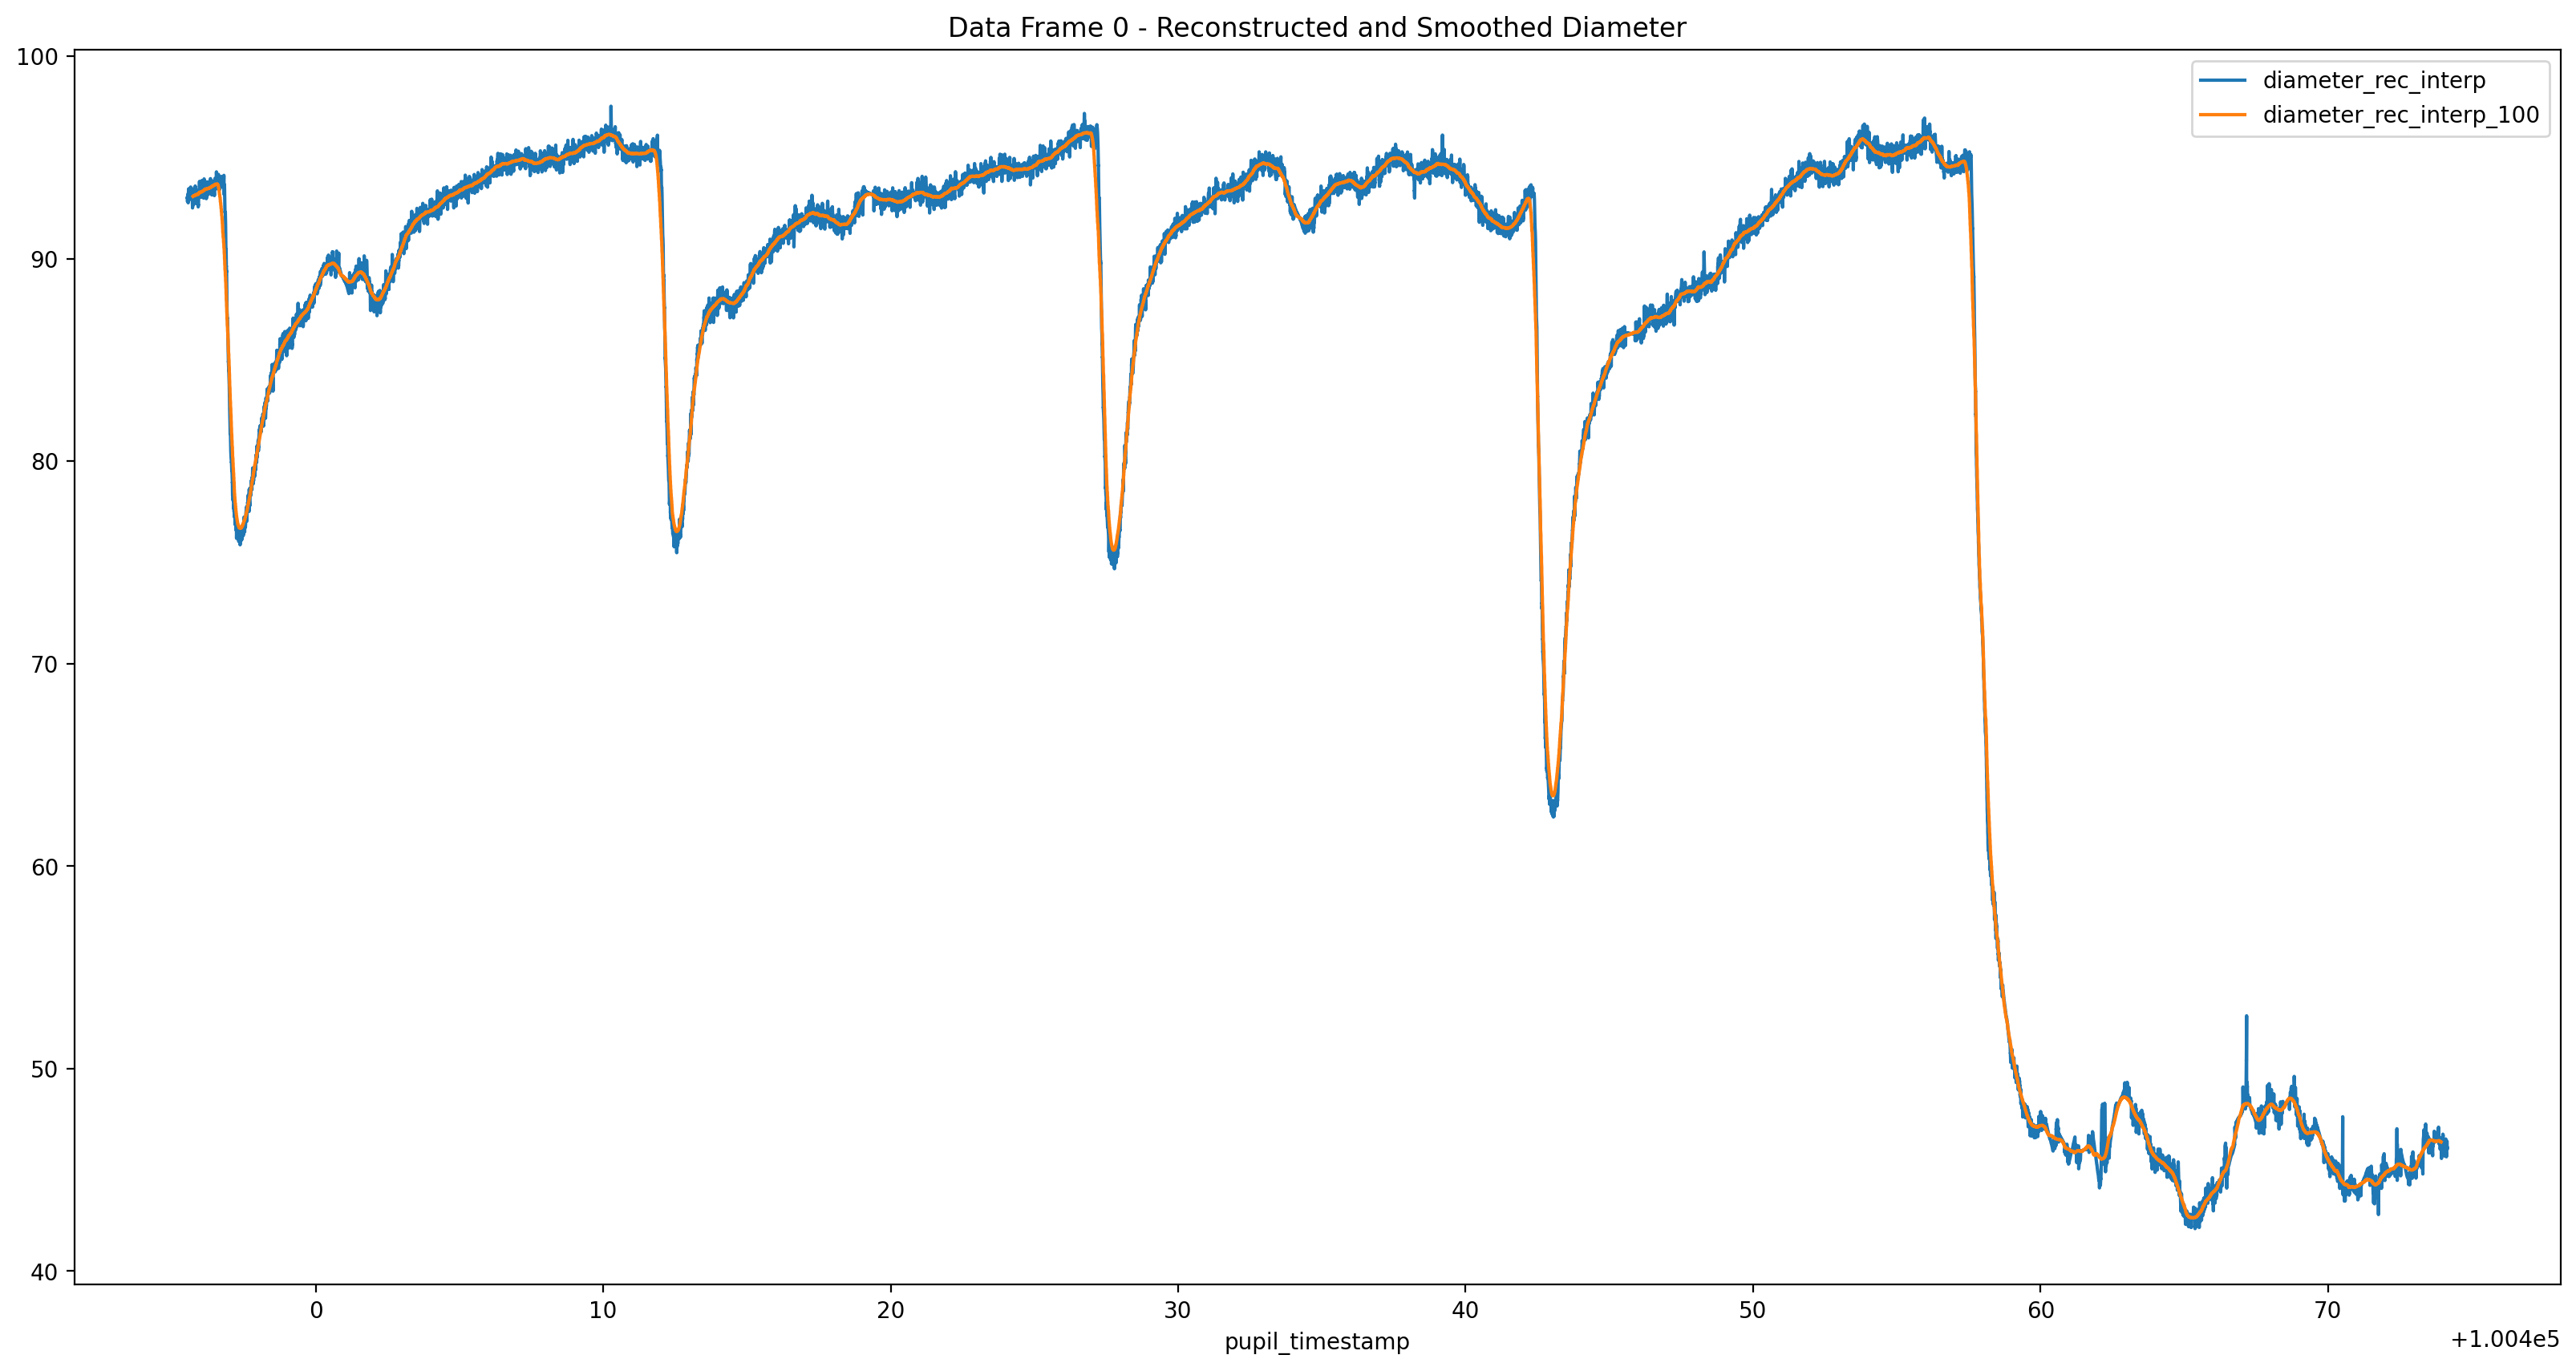

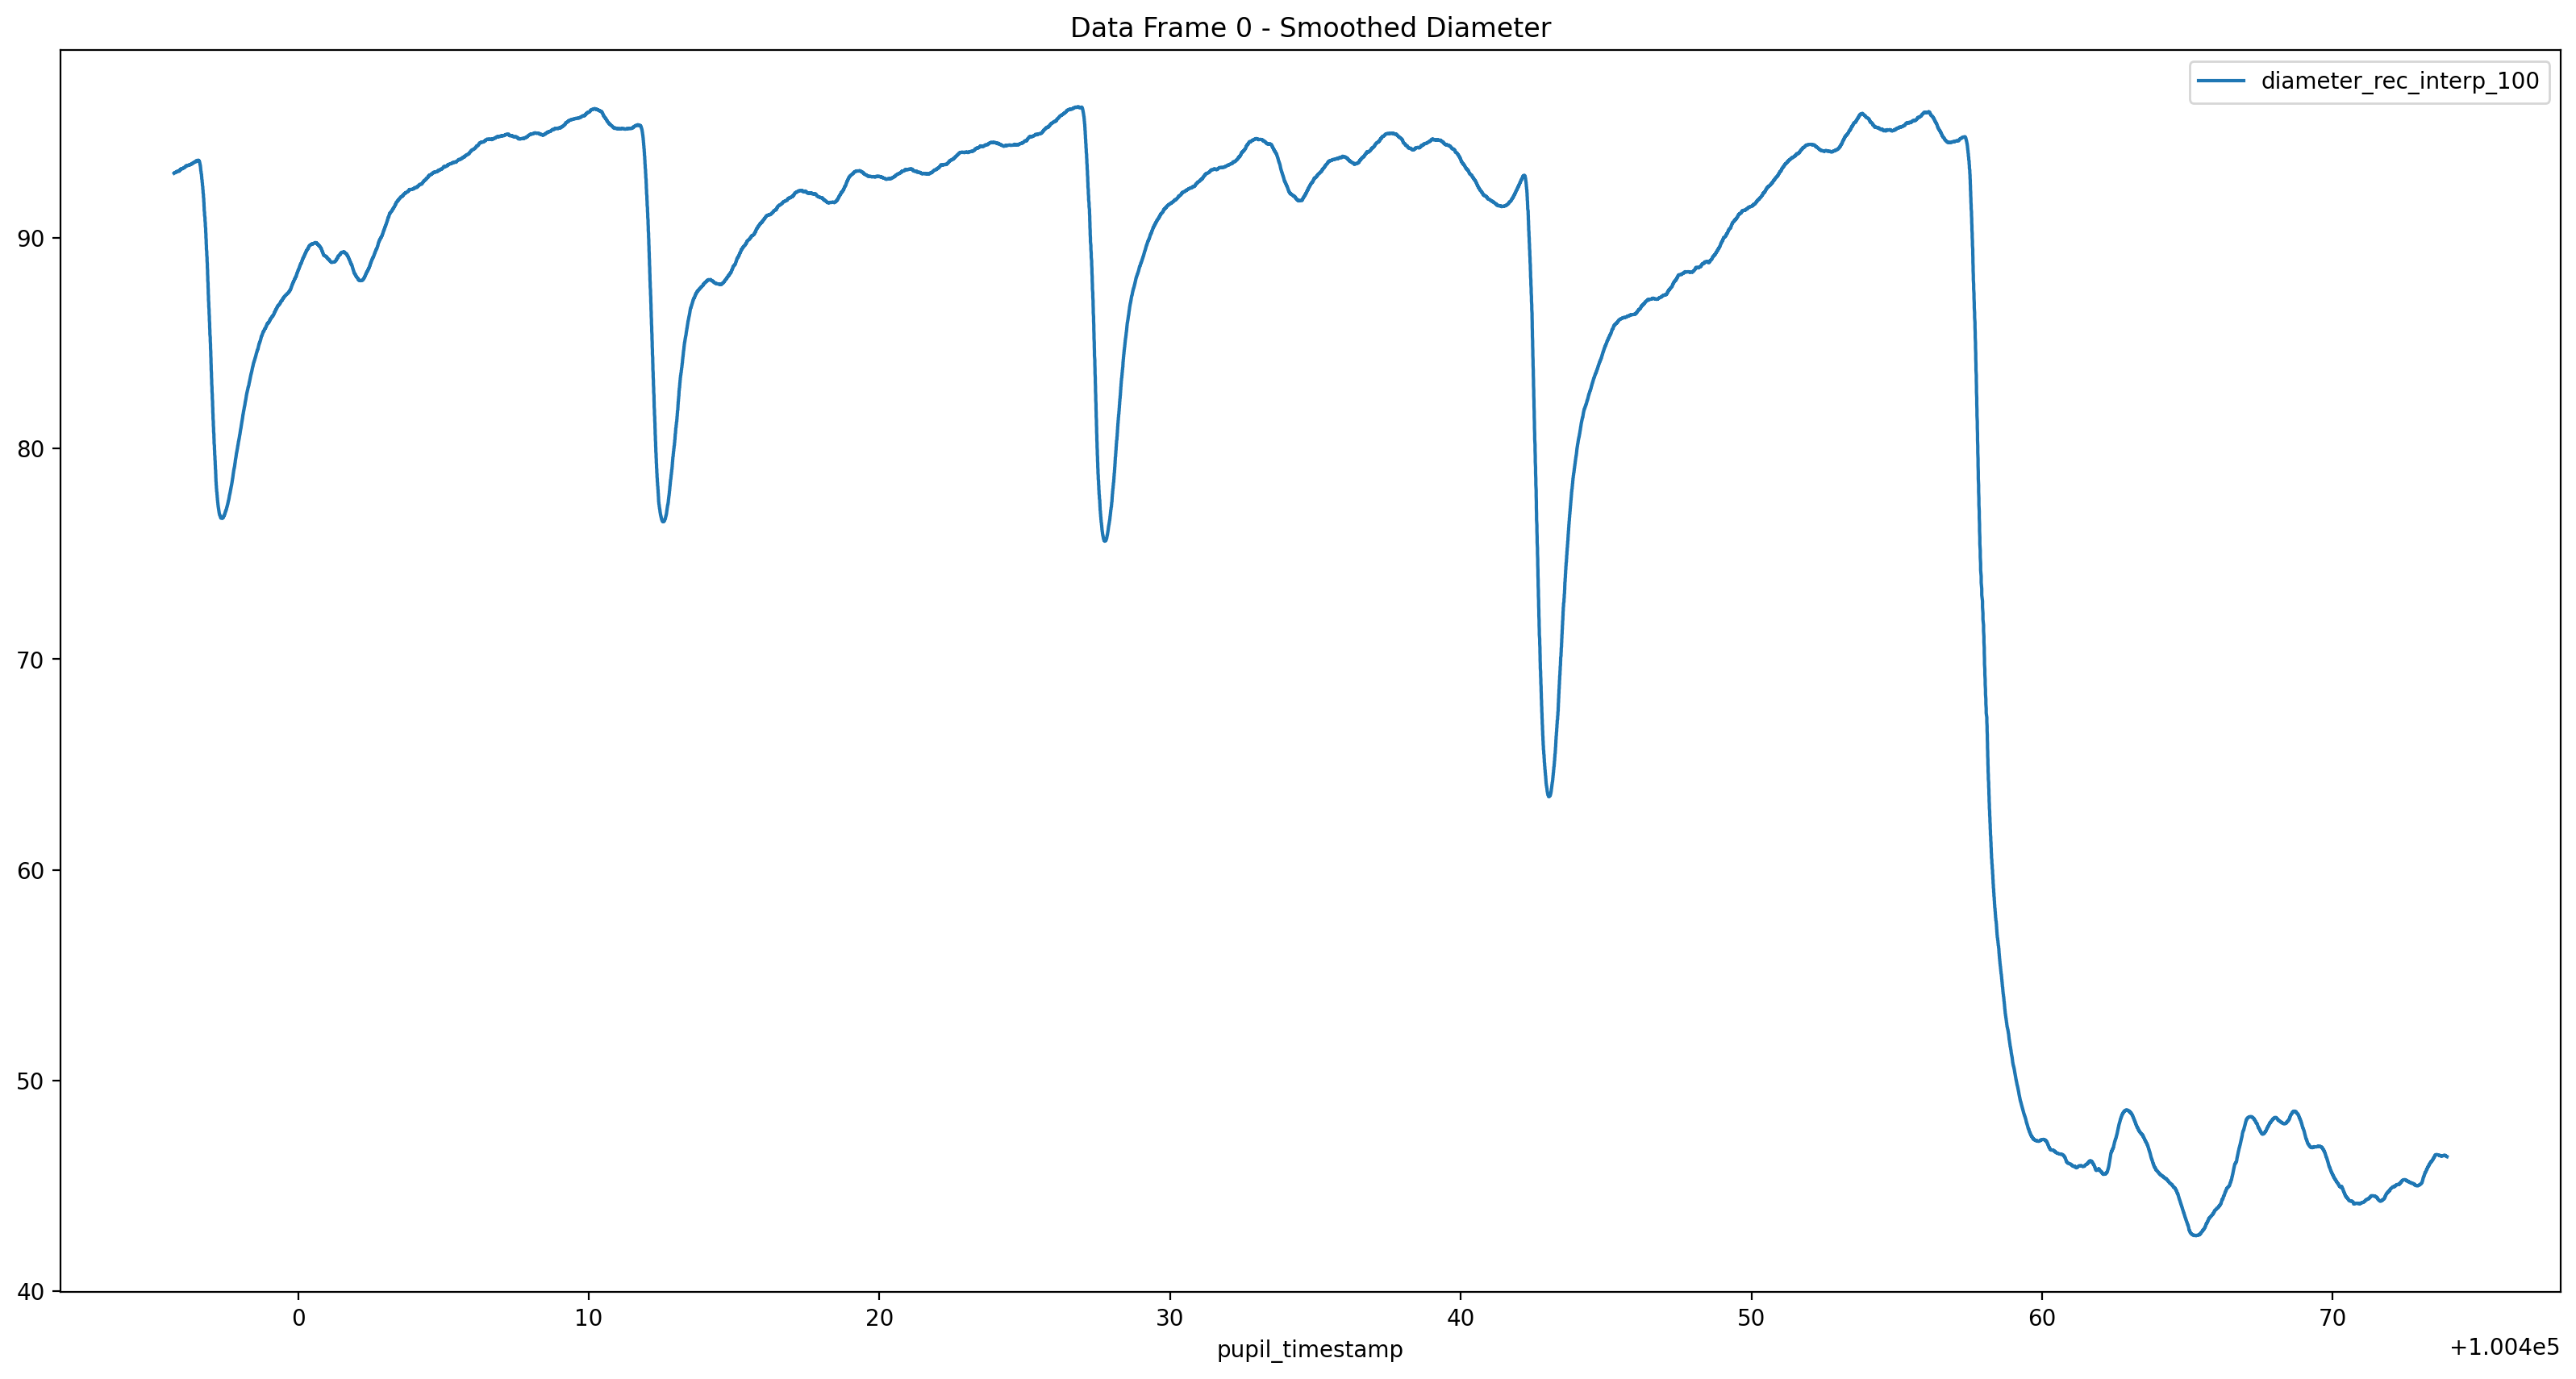

In [26]:
importlib.reload(checkdataPLR)
# Let's try to remove blinks and filter the result


#what=eye0[0]
plot_range = range(1)  # Indices of data frames to plot (0-19)

def reconstruct(eye, window_size=100):
        # Remove blinks.
        eye['diameter_rec']=checkdataPLR.blinkreconstruct(eye['diameter'], 
                                                       vt_start=50,vt_end=5, mode='advanced')
        # blinkreconstruct replaces the bliks with NaN with mode='advanced',
        # so we interpolate the gaps and low pass the result to obtain something. 
        eye['diameter_rec_interp']=eye['diameter_rec'].interpolate(method='linear')
        # Use moving average + recenter as low pass.
        eye['diameter_rec_interp_100']=eye['diameter_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)


# Iterate over the specified data frames
for i in plot_range:
    what = eye0[i]
    reconstruct(what)

    def reconstruct(eye, window_size=100):
        # Remove blinks.
        eye['diameter_rec']=checkdataPLR.blinkreconstruct(eye['diameter'], 
                                                       vt_start=50,vt_end=5, maxdur=5000, mode='advanced')
        # blinkreconstruct replaces the bliks with NaN with mode='advanced',
        # so we interpolate the gaps and low pass the result to obtain something. 
        eye['diameter_rec_interp']=eye['diameter_rec'].interpolate(method='linear')
        # Use moving average + recenter as low pass.
        eye['diameter_rec_interp_100']=eye['diameter_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)

        
plot_range = range(1)  # Indices of data frames to plot (0-19)

    # Iterate over the specified data frames
for i in plot_range:
    what = eye0[i]
    reconstruct(what)
    
    sub = what.plot(x='pupil_timestamp', y='diameter', kind='line')

    sub = what.plot(ax=sub, x='pupil_timestamp', y='diameter_rec_interp', kind='line')
    sub.set_title(f"Data Frame {i} - Original and Reconstructed Diameter")

    sub = what.plot(x='pupil_timestamp', y='diameter_rec_interp', kind='line')

    sub = what.plot(ax=sub, x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
    sub.set_title(f"Data Frame {i} - Reconstructed and Smoothed Diameter")

    what.plot(x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
    plt.title(f"Data Frame {i} - Smoothed Diameter")

    plt.show()

    
# Iterate over the specified data frames
#for i in plot_range:
 #   what = eye0[i]
  #  reconstruct(eye)
    
   # sub=eye.plot(x='pupil_timestamp', y='diameter', kind='line')
    #sub.set_title(f"Data Frame {i} - Original Diameter")
    #sub=eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec', kind='line')
    #eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp', kind='line')

    #sub=eye.plot(x='pupil_timestamp', y='diameter_rec_interp', kind='line')
    #eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
    # Make an extra plot to see how the smoothed data looks like
    #eye.plot(x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')



    
# How does it look like?
#eye=eye0[1]
#reconstruct(eye)

#sub=eye.plot(x='pupil_timestamp', y='diameter', kind='line')
#sub=eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec', kind='line')
#eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp', kind='line')

#sub=eye.plot(x='pupil_timestamp', y='diameter_rec_interp', kind='line')
#eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
# Make an extra plot to see how the smoothed data looks like
#eye.plot(x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')


pandas.core.series.Series

pandas.core.series.Series

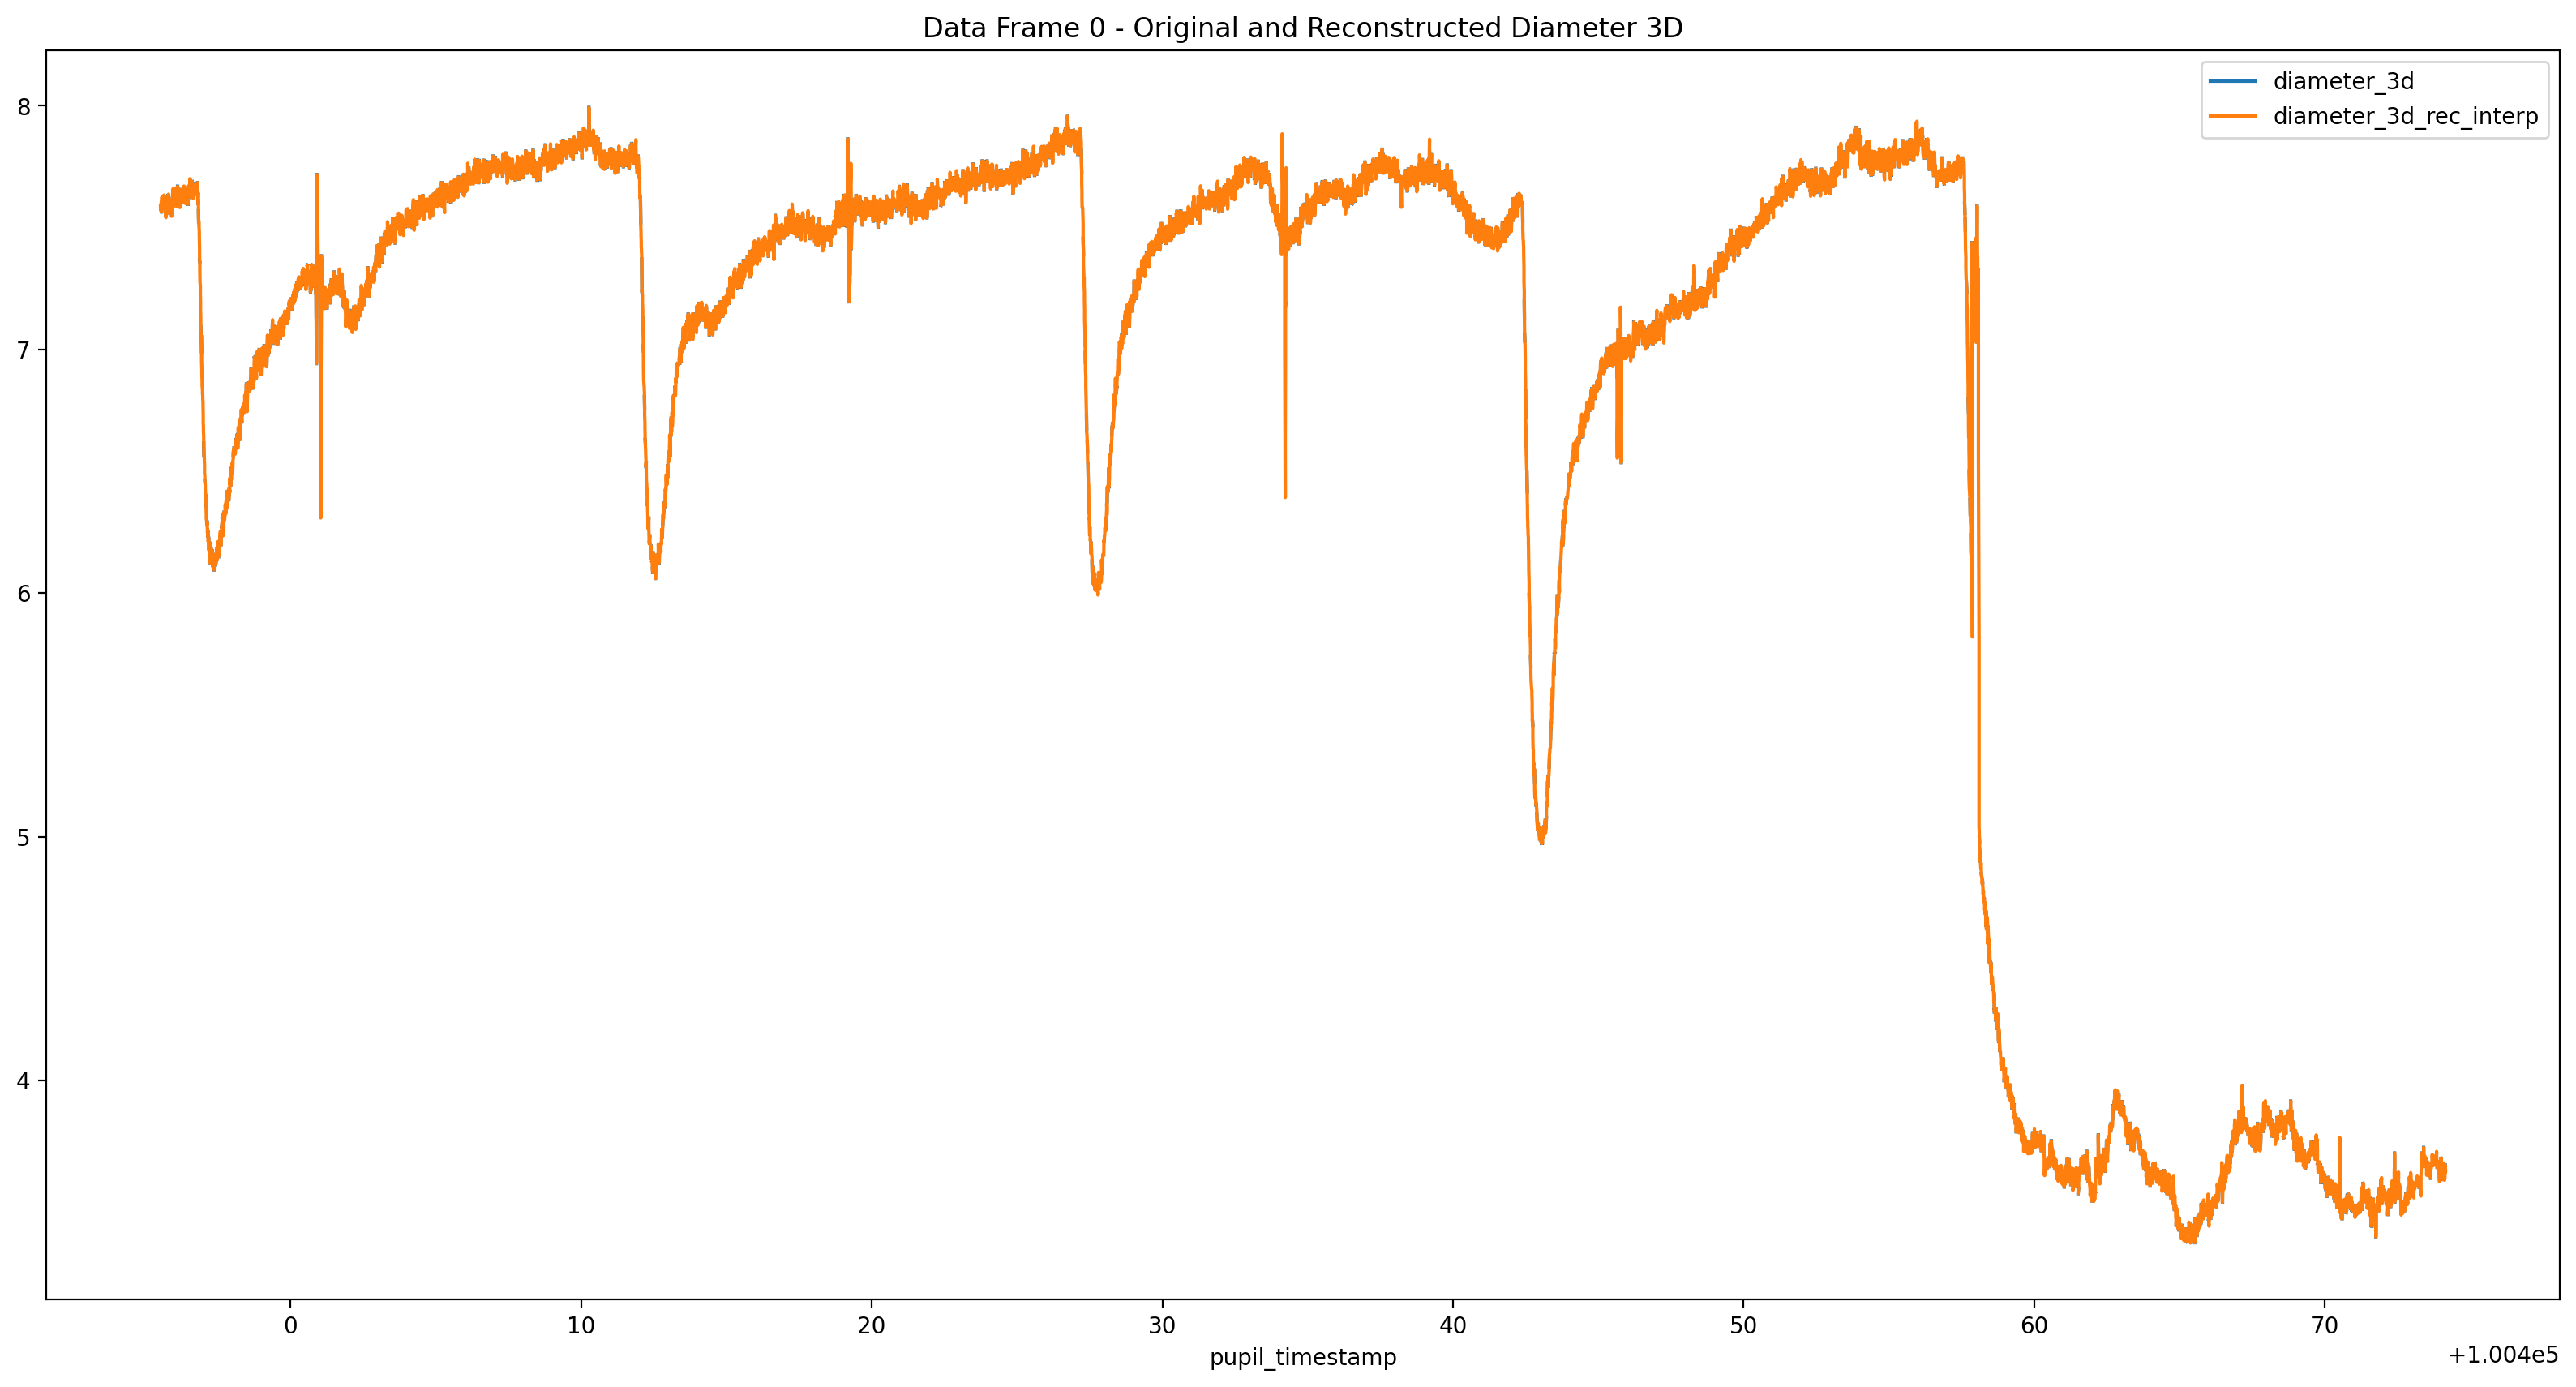

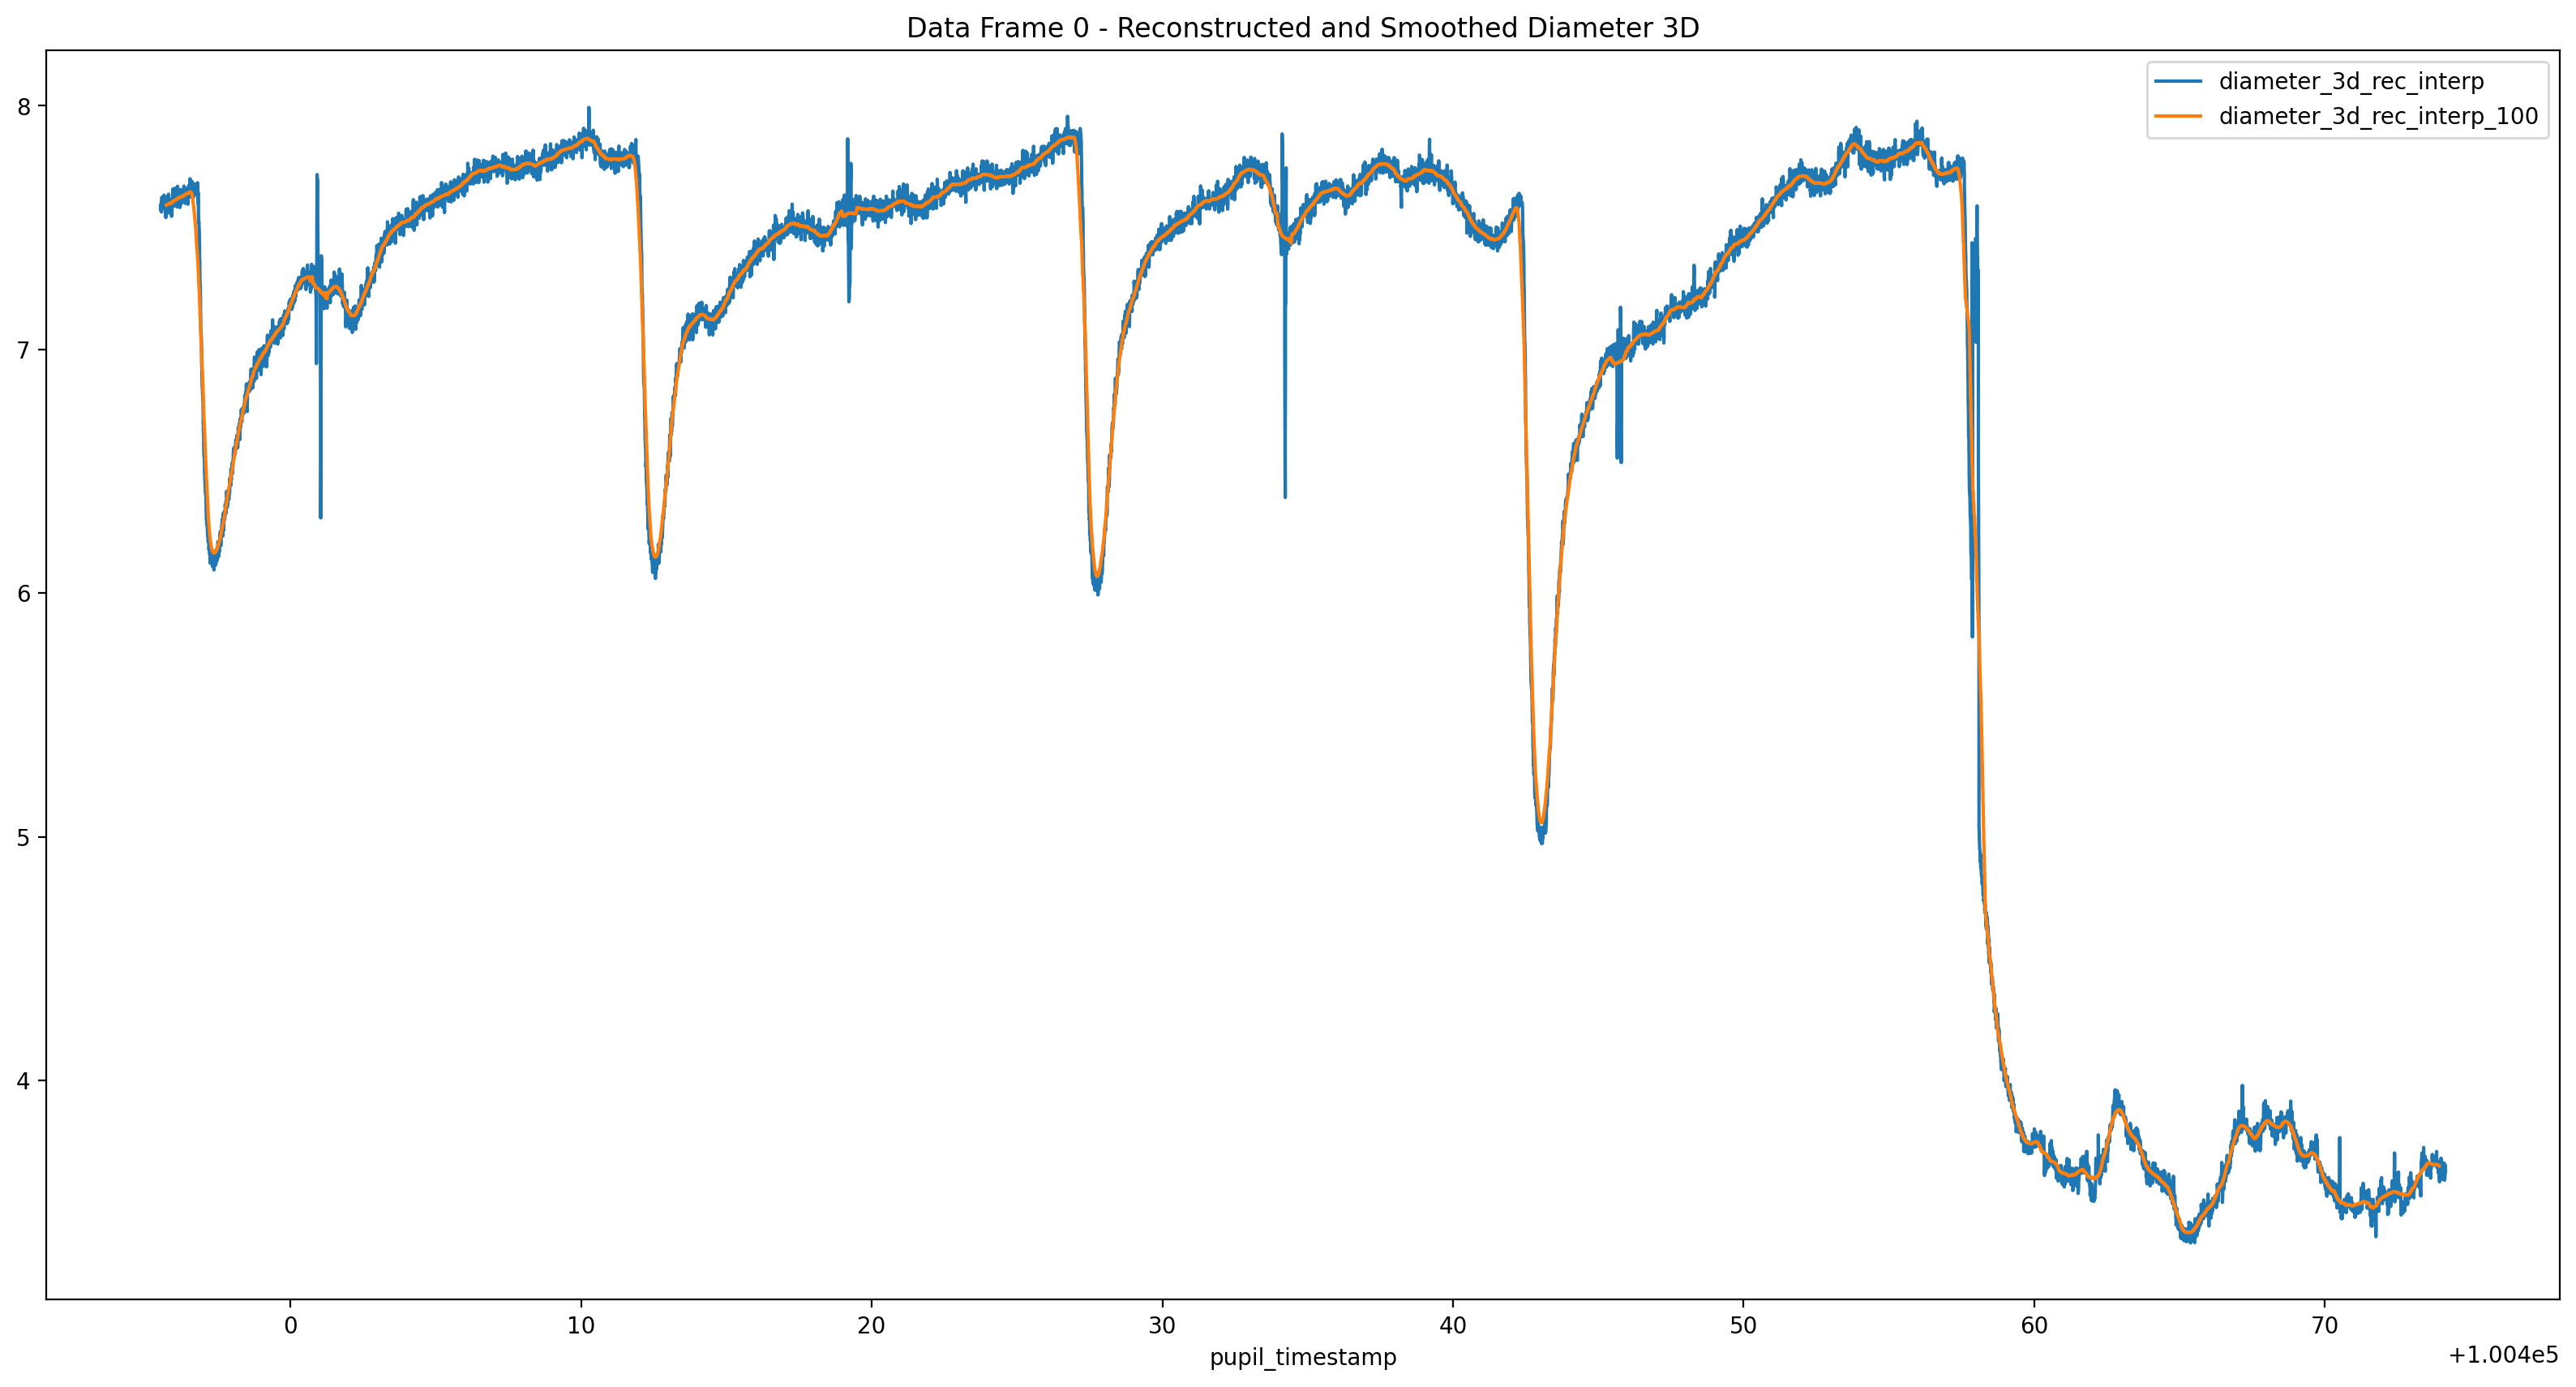

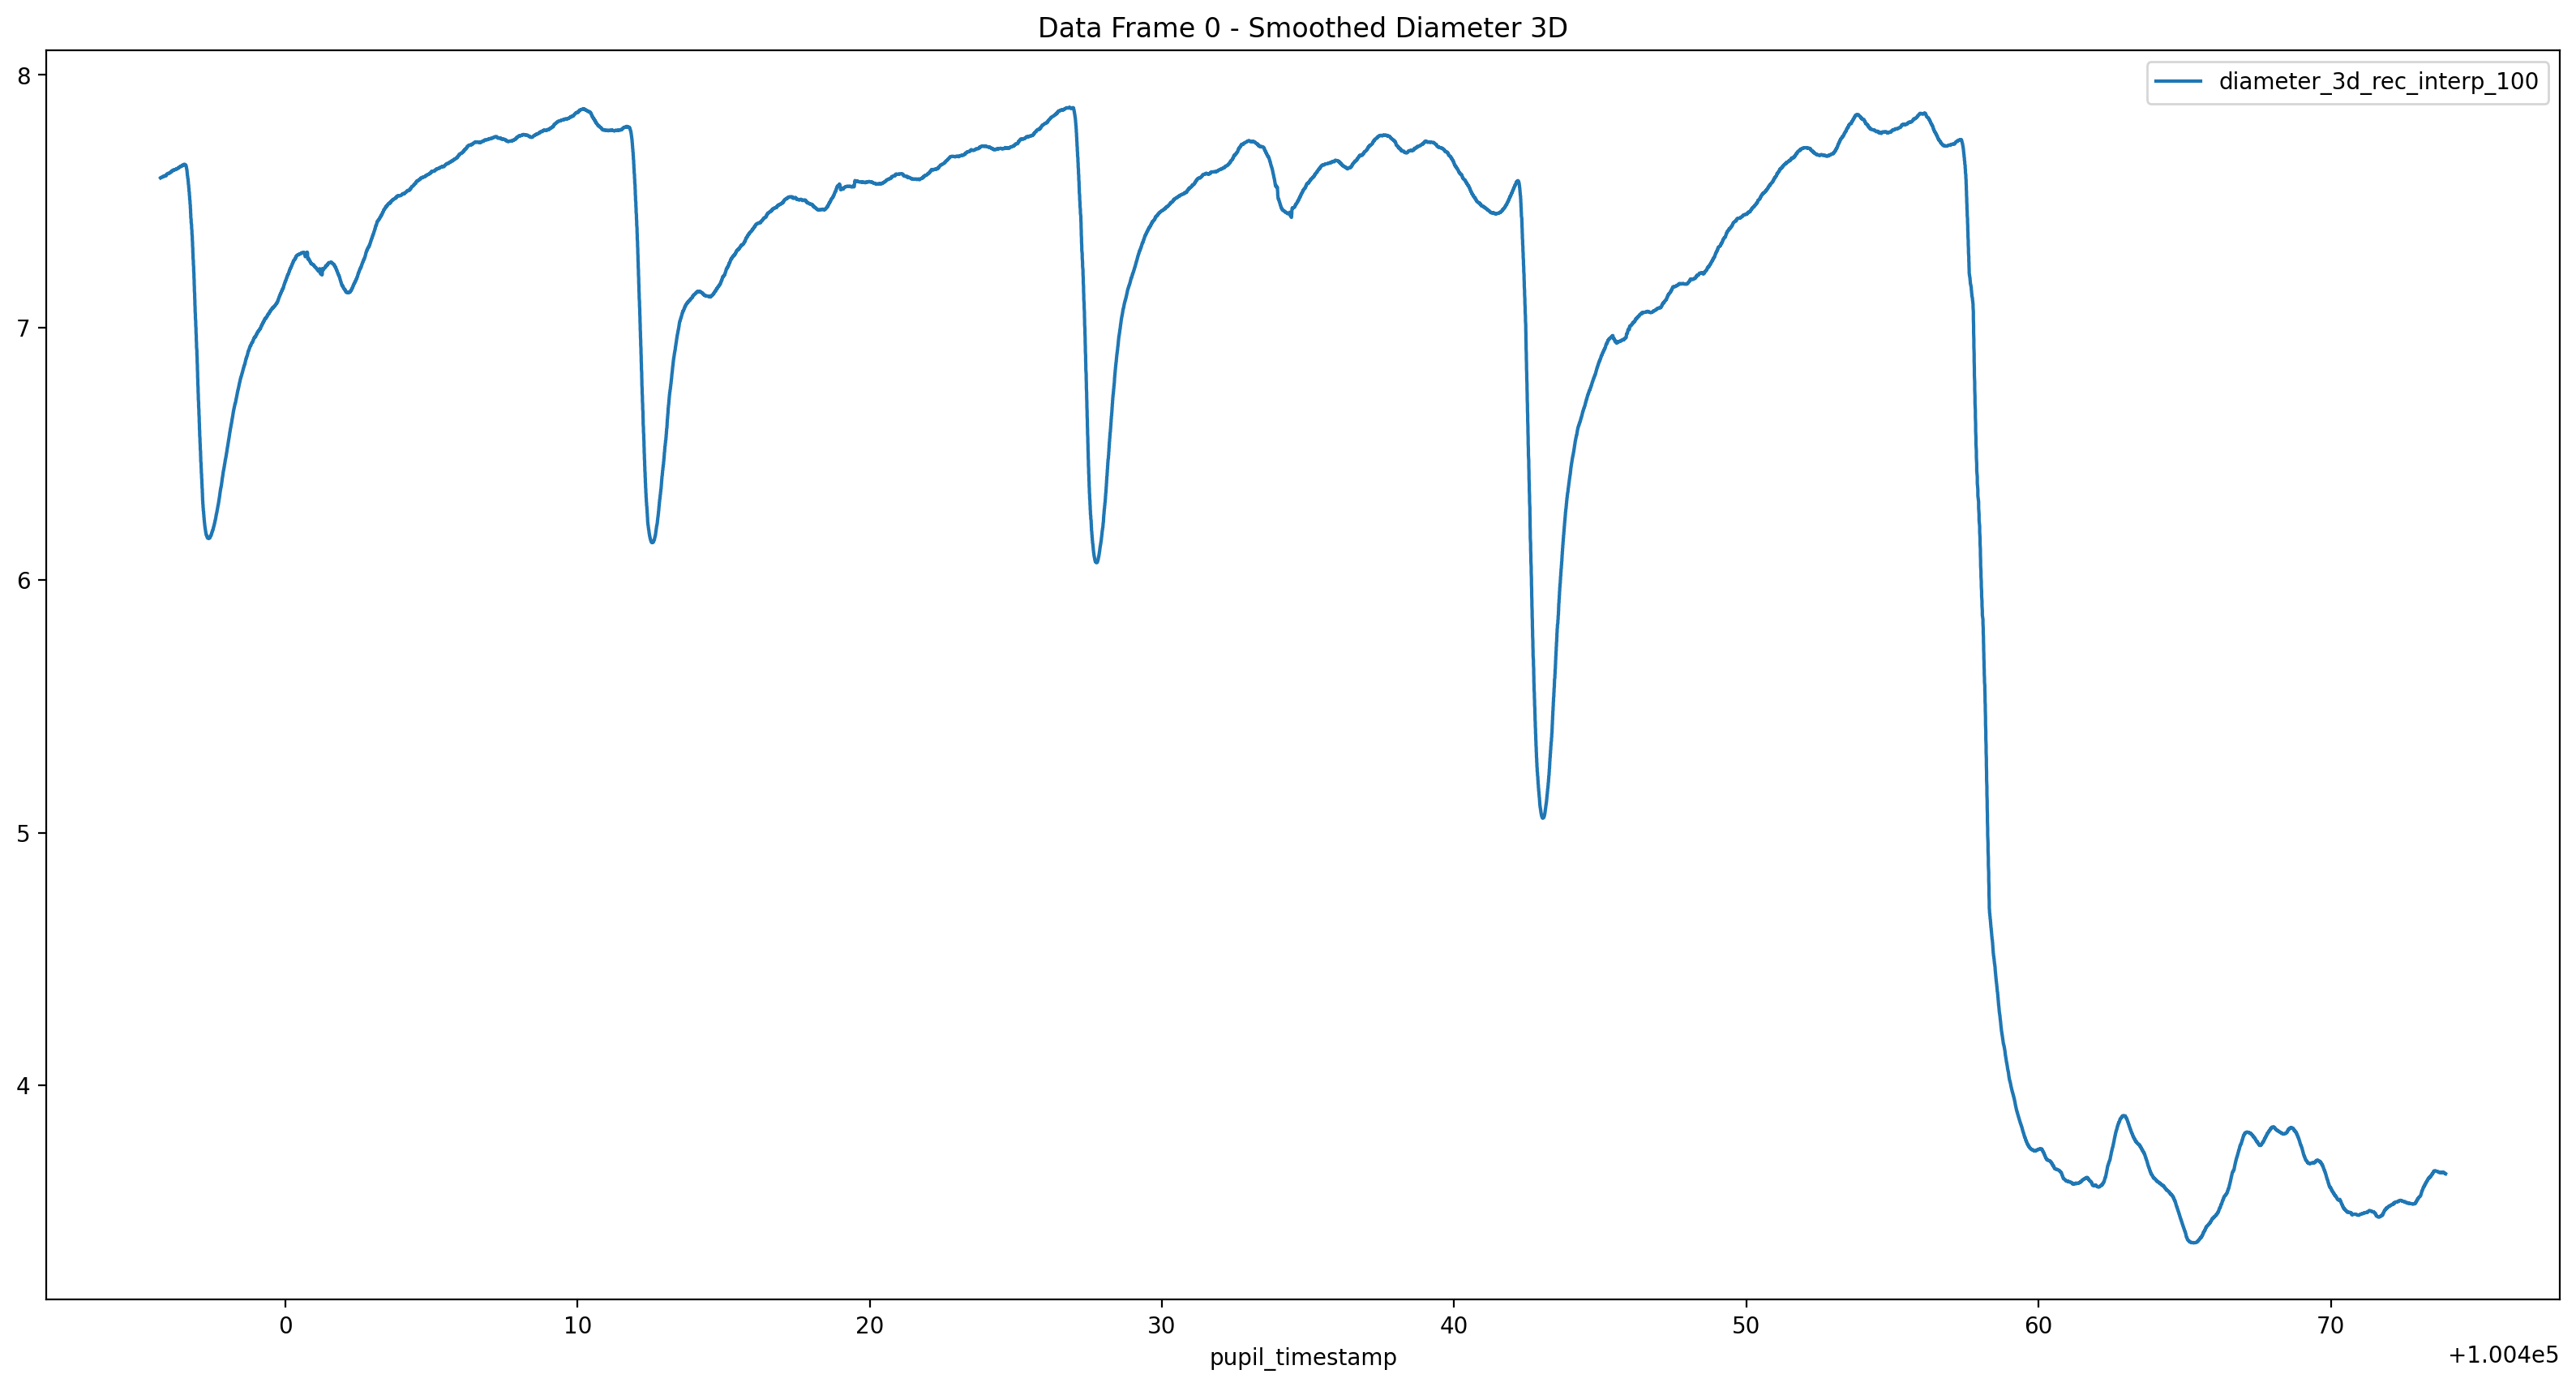

In [27]:
# Iterate over the specified data frames
for i in plot_range:
    what = eye0[i]
    reconstruct(what)
    
    def reconstruct3d(eye, window_size=100):
        # Remove blinks.
        eye['diameter_3d_interp']=eye['diameter_3d'].interpolate(method='linear')
        eye['diameter_3d_rec']=checkdataPLR.blinkreconstruct(eye['diameter_3d_interp'],
                                                          mode='advanced')
        # blinkreconstruct replaces the bliks with NaN with mode='advanced',
        # so we interpolate the gaps and low pass the result to obtain something. 
        eye['diameter_3d_rec_interp']=eye['diameter_3d_rec'].interpolate(method='linear')
        # Use moving average + recenter as low pass.
        eye['diameter_3d_rec_interp_100']=eye['diameter_3d_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)

        
plot_range = range(1)  # Indices of data frames to plot (0-19)

    # Iterate over the specified data frames
for i in plot_range:
    what = eye0[i]
    reconstruct3d(what)
    
    sub = what.plot(x='pupil_timestamp', y='diameter_3d', kind='line')

    sub = what.plot(ax=sub, x='pupil_timestamp', y='diameter_3d_rec_interp', kind='line')
    sub.set_title(f"Data Frame {i} - Original and Reconstructed Diameter 3D")

    sub = what.plot(x='pupil_timestamp', y='diameter_3d_rec_interp', kind='line')

    sub = what.plot(ax=sub, x='pupil_timestamp', y='diameter_3d_rec_interp_100', kind='line')
    sub.set_title(f"Data Frame {i} - Reconstructed and Smoothed Diameter 3D")

    what.plot(x='pupil_timestamp', y='diameter_3d_rec_interp_100', kind='line')
    plt.title(f"Data Frame {i} - Smoothed Diameter 3D")

    plt.show()


# How does it look like?
#eye=eye0[1]
#reconstruct3d(eye)

#eye.plot(x='pupil_timestamp', y='diameter_3d', kind='line')

#sub=eye.plot(x='pupil_timestamp', y='diameter_3d', kind='line')
#sub=eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec', kind='line')
#eye.plot(ax=sub,x='pupil_timestamp', y='diameter_3d_rec_interp', kind='line')

#sub=eye.plot(x='pupil_timestamp', y='diameter_3d_rec_interp', kind='line')
#eye.plot(ax=sub,x='pupil_timestamp', y='diameter_3d_rec_interp_100', kind='line')
# Make an extra plot to see how the smoothed data looks like
#eye.plot(x='pupil_timestamp', y='diameter_3d_rec_interp_100', kind='line')



In [35]:
import DataAnalysisPLR
importlib.reload(DataAnalysisPLR)

display(subject_id)
display(data_dir)

NameError: name 'config' is not defined

In [227]:
importlib.reload(preprocessingCopy1)
preprocessingCopy1.process(0,'diameter',subject_id,"Stimulation","30",data_dir,display)
preprocessingCopy1.process(0,'diameter_3d',subject_id,"Stimulation","30",data_dir,display)
display("OK")

'Starting process2'

'Loop through each annotation timestamp and slice the data'

'The 0.02 quantile of pupil size for confidence >= 0.6 is 0.75.'

'Loop through each annotation timestamp and create a list with the dataframes and a variable for each dataframe'

'preprocess and slice data'

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

'apply timeslots'

'merge dataframes'

'save processed data to /Users/Katharina/Desktop/Beispieldaten/PJ01_2_Ruhe_Stimulation_eye_id0_diameter_list.csv and /Users/Katharina/Desktop/Beispieldaten/PJ01_2_Ruhe_Stimulation_eye_id0_diameter_mean.csv'

,time_slot,eye_id,diameter
0,-321.504978,eye_id0,98.071403
1,-320.504978,eye_id0,98.147484
2,-319.504978,eye_id0,98.267476
3,-318.504978,eye_id0,98.353734
4,-317.504978,eye_id0,98.402873
...,...,...,...
842,525.495022,eye_id0,93.221598
843,526.495022,eye_id0,93.247414
844,527.495022,eye_id0,93.284682
845,528.495022,eye_id0,93.363637


'Starting process2'

'Loop through each annotation timestamp and slice the data'

'The 0.02 quantile of pupil size for confidence >= 0.6 is 0.75.'

'Loop through each annotation timestamp and create a list with the dataframes and a variable for each dataframe'

'preprocess and slice data'

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

'apply timeslots'

'merge dataframes'

'save processed data to /Users/Katharina/Desktop/Beispieldaten/PJ01_2_Ruhe_Stimulation_eye_id0_diameter_3d_list.csv and /Users/Katharina/Desktop/Beispieldaten/PJ01_2_Ruhe_Stimulation_eye_id0_diameter_3d_mean.csv'

,time_slot,eye_id,diameter_3d
0,-321.504978,eye_id0,6.207861
1,-320.504978,eye_id0,6.211924
2,-319.504978,eye_id0,6.217831
3,-318.504978,eye_id0,6.224608
4,-317.504978,eye_id0,6.229362
...,...,...,...
842,525.495022,eye_id0,6.005934
843,526.495022,eye_id0,6.006261
844,527.495022,eye_id0,6.007559
845,528.495022,eye_id0,6.011483


'OK'

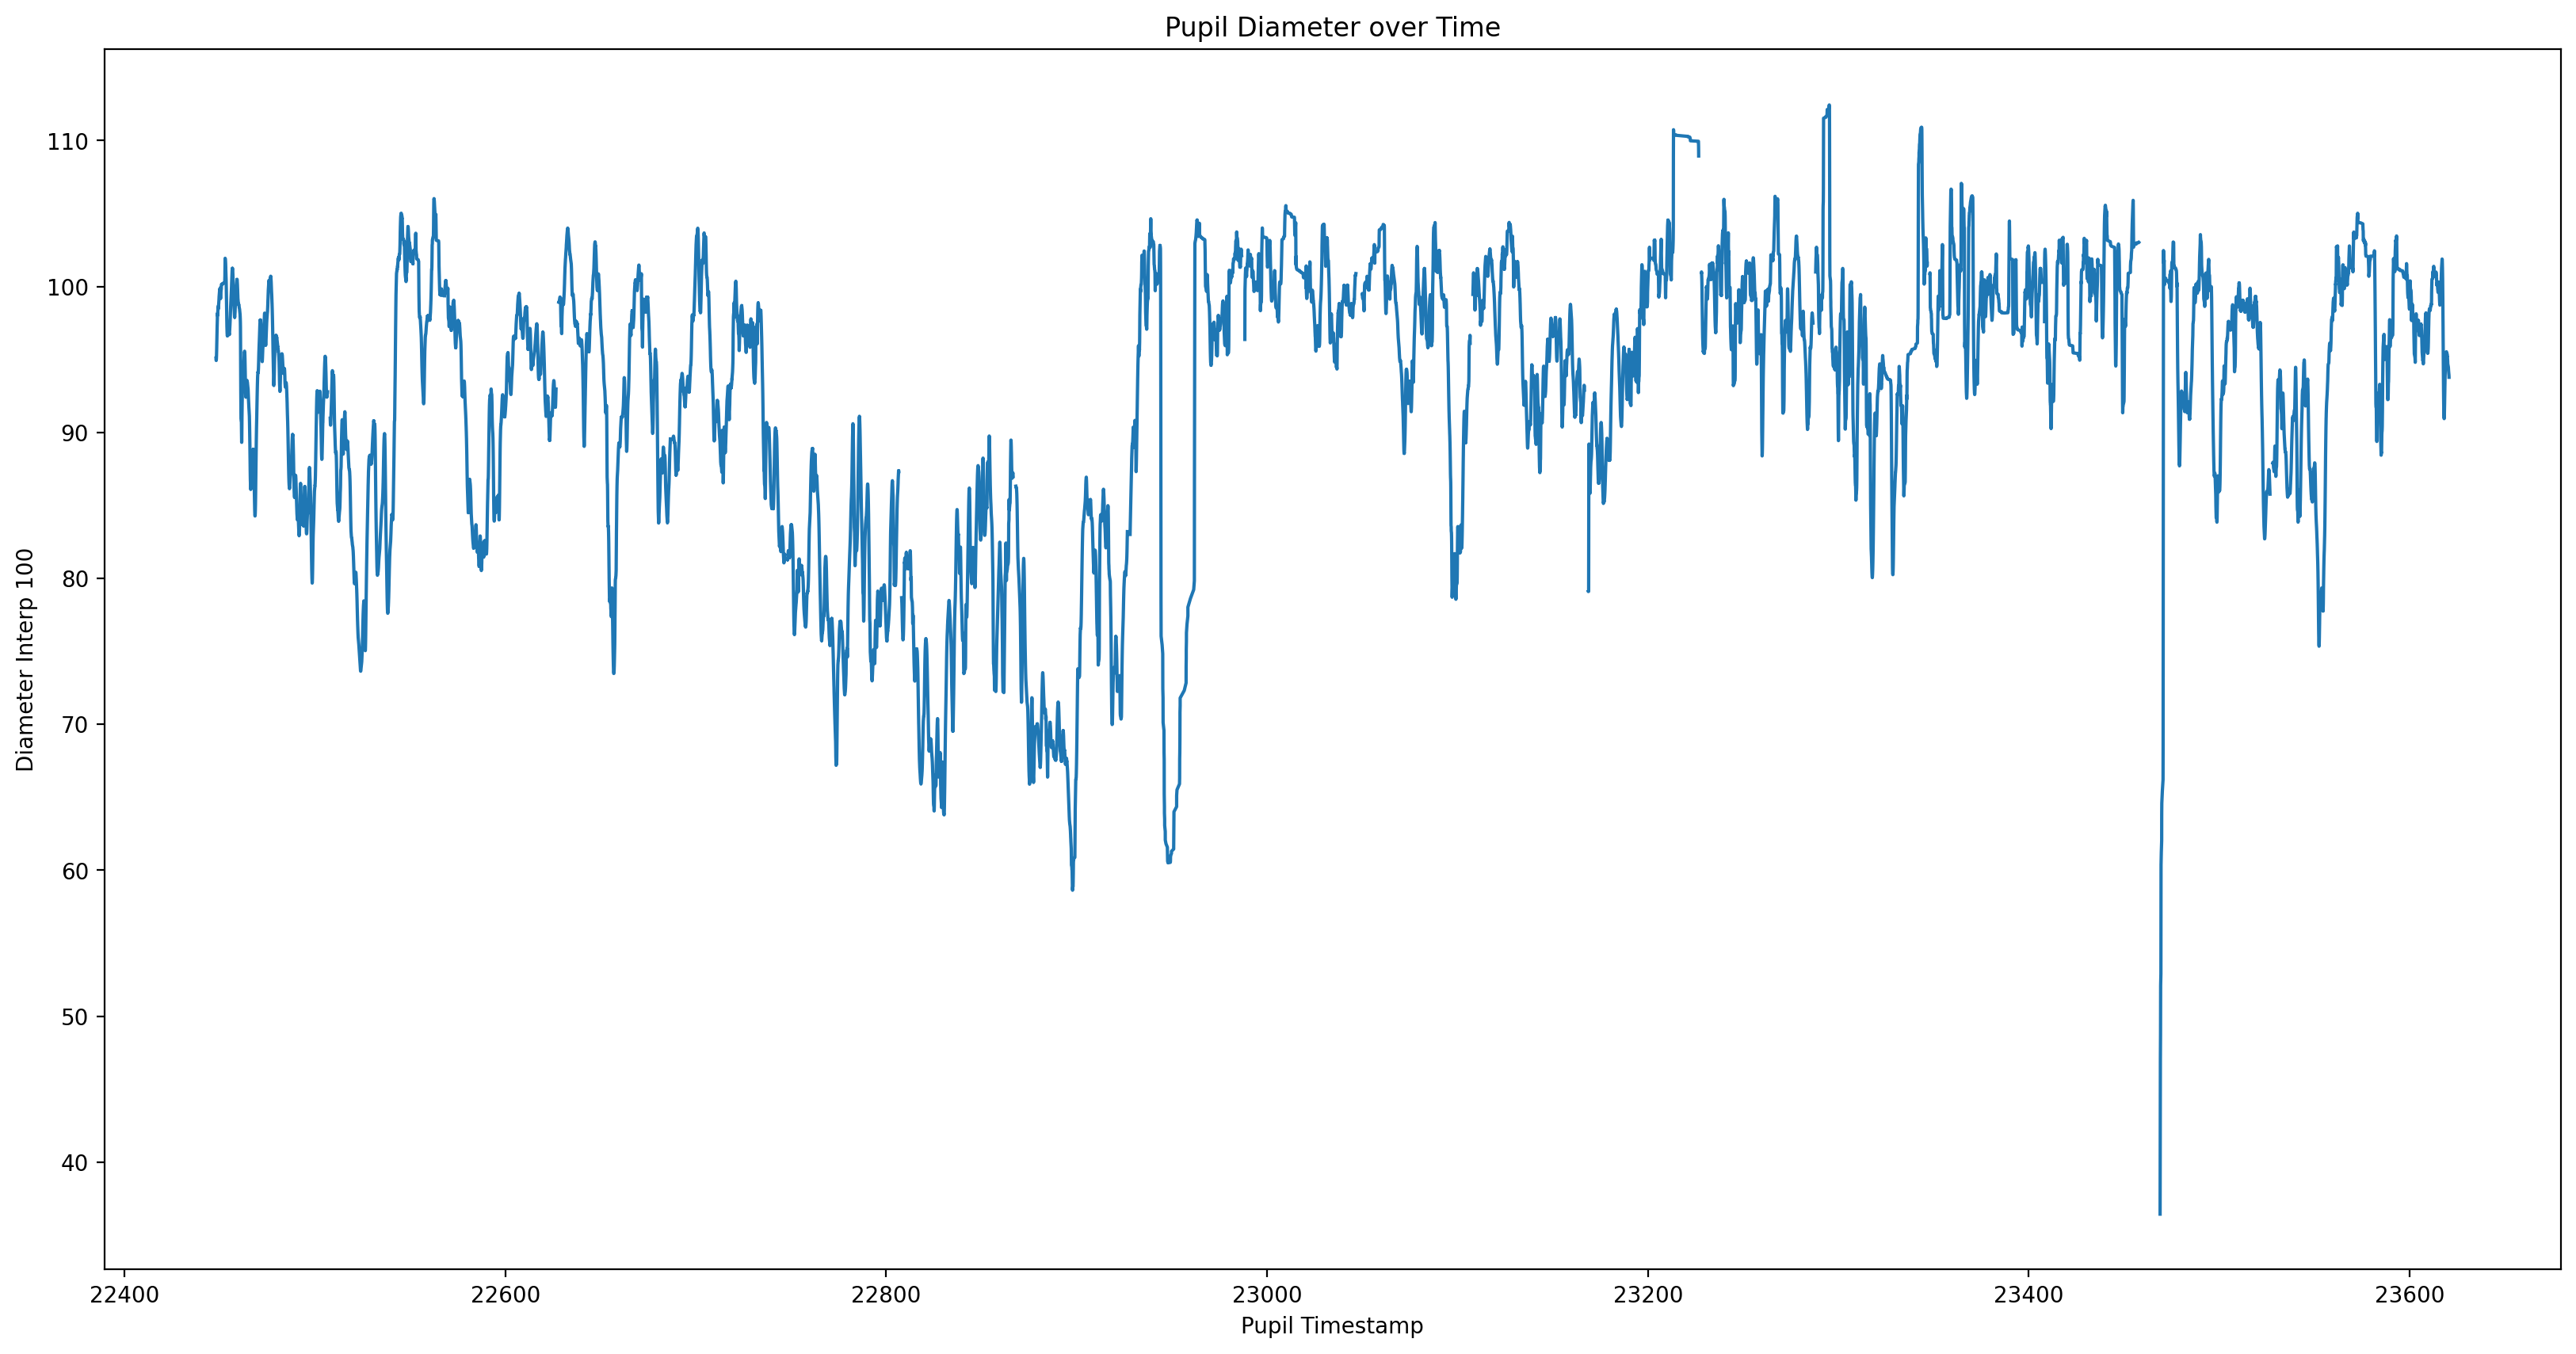

In [228]:
data = pd.read_csv('/Users/Katharina/Desktop/Beispieldaten/PJ01_2_Ruhe_Stimulation_eye_id0_diameter_list.csv')
plt.plot(data['pupil_timestamp'], data['diameter_rec_interp_100'])
plt.xlabel('Pupil Timestamp')
plt.ylabel('Diameter Interp 100')
plt.title('Pupil Diameter over Time')
plt.show()
